In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,W/C,W/B,A/C,Cement,Silica fume,Fly ash,Slag,Metakaolin,Filler,Superplasticizer,SAP,SAP size,SAP water uptake,Time,Shrinkage/Swelling
0,0.33,0.180,1.10,580.0,45.40,36.3,0.0,0.0,0.0,2.00,0.0,100.0,6.0,1,-2917.7
1,0.17,0.168,1.47,864.0,1.16,0.0,0.0,0.0,0.0,0.16,0.0,0.0,0.0,1,-2563.1
2,0.30,0.250,0.00,1440.0,20.00,0.0,0.0,0.0,0.0,0.80,0.0,200.0,20.0,1,-2404.3
3,0.25,0.250,0.00,1762.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,200.0,13.0,1,-2360.6
4,0.33,0.180,1.10,580.0,45.40,36.3,0.0,0.0,0.0,2.00,0.3,100.0,6.0,1,-2251.5


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W/C,1889.0,0.395725,0.170377,0.170,0.300,0.35,0.440,1.60
W/B,1889.0,0.333774,0.113618,0.157,0.266,0.30,0.374,0.86
A/C,1889.0,2.828722,2.021473,0.000,1.240,3.28,4.020,11.56
Cement,1889.0,637.408735,364.994338,167.400,418.000,498.00,700.000,1762.00
Silica fume,1889.0,4.804399,8.444461,0.000,0.000,0.00,10.000,50.00
Fly ash,1889.0,5.126532,14.320841,0.000,0.000,0.00,0.000,100.00
Slag,1889.0,8.050413,36.714521,0.000,0.000,0.00,0.000,400.00
Metakaolin,1889.0,0.702912,4.853472,0.000,0.000,0.00,0.000,57.40
Filler,1889.0,4.512313,13.834743,0.000,0.000,0.00,0.000,125.00
Superplasticizer,1889.0,1.392253,1.978321,0.000,0.000,0.80,1.800,11.82


<AxesSubplot:xlabel='W/C', ylabel='Count'>

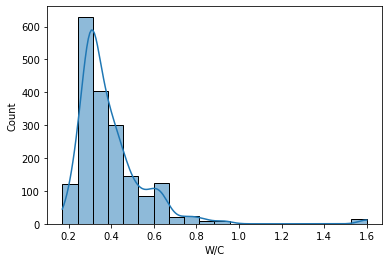

In [5]:
sns.histplot(data=df,x='W/C',bins=20,kde=True)

<AxesSubplot:>

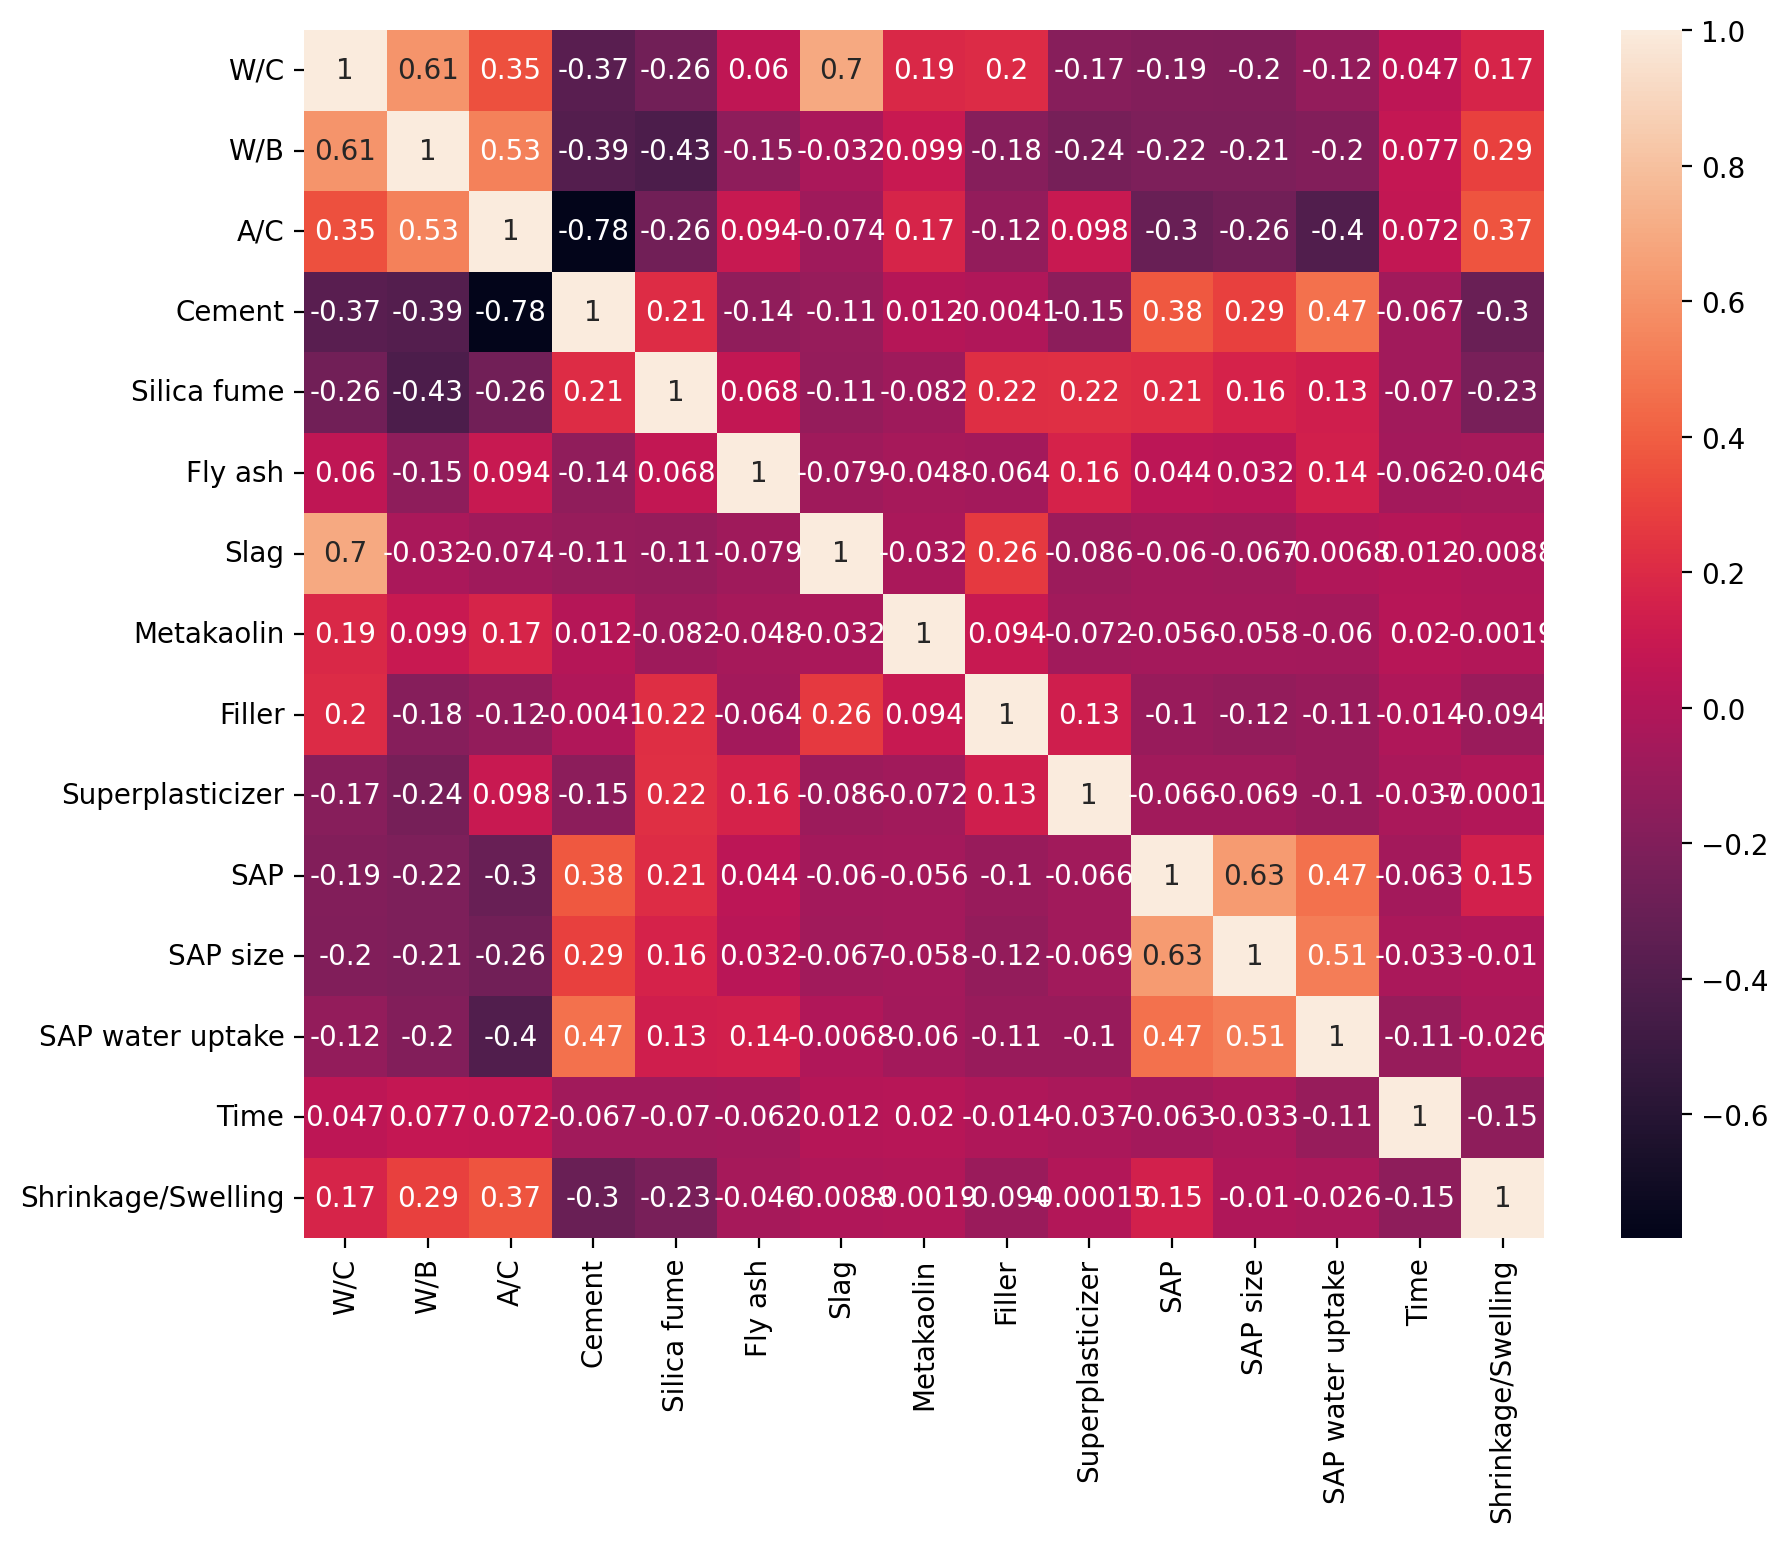

In [6]:
plt.figure(figsize=(10,8),dpi=200)
sns.heatmap(data=df.corr(),annot=True)

In [7]:
X=df.drop('Shrinkage/Swelling',axis=1)
y=df['Shrinkage/Swelling']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
scaled_Xtrain=scaler.fit_transform(X_train)

In [15]:
scaled_Xtest=scaler.transform(X_test)

In [16]:
knn_error=[]

for k in range(1,30):
    knn_model=KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(scaled_Xtrain,y_train)
    
    y_knn_predict=knn_model.predict(scaled_Xtest)
    
    error=mean_absolute_error(y_test,y_knn_predict)
    
    knn_error.append(error)
    

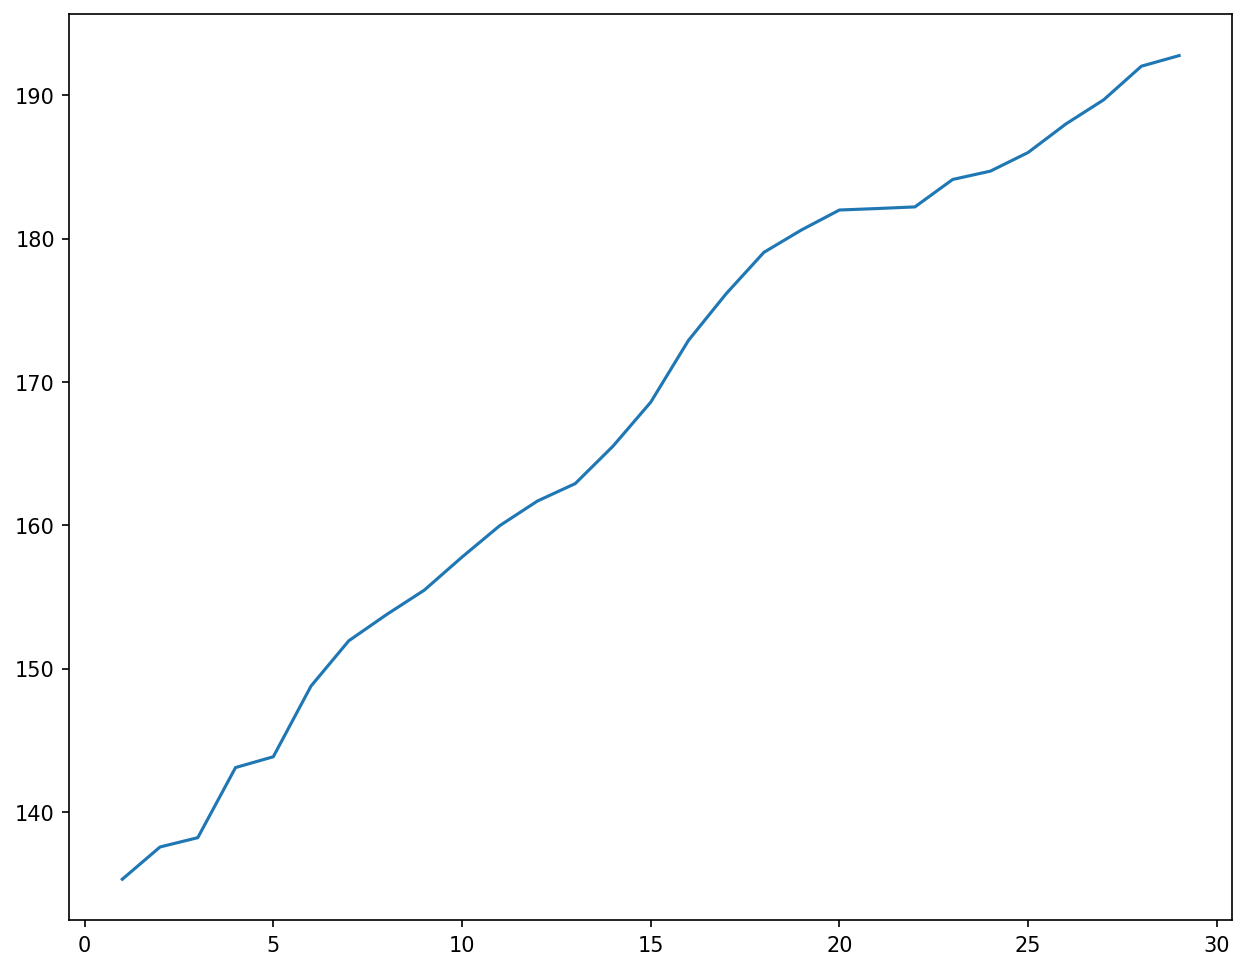

In [17]:
plt.figure(figsize=(10,8),dpi=150)
plt.plot(range(1,30),knn_error)


In [18]:
final_knn=KNeighborsRegressor(n_neighbors=1)
final_knn.fit(scaled_Xtrain,y_train)
final_predict=final_knn.predict(scaled_Xtest)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,final_predict)

0.7157512957941261

In [20]:
mean_squared_error(y_test,final_predict)**0.5

269.3725855414204

In [21]:
mean_absolute_error(y_test,final_predict)

135.31463844797176

In [25]:
#help(KNeighborsRegressor)

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
random=RandomForestRegressor()

In [30]:
random_error=[]

for n in range(1,40):
    random_model=RandomForestRegressor(n_estimators=n)
    
    random_model.fit(X_train,y_train)
    
    random_predict=random_model.predict(X_test)
    
    error_rd=mean_absolute_error(y_test,random_predict)
    
    random_error.append(error_rd)


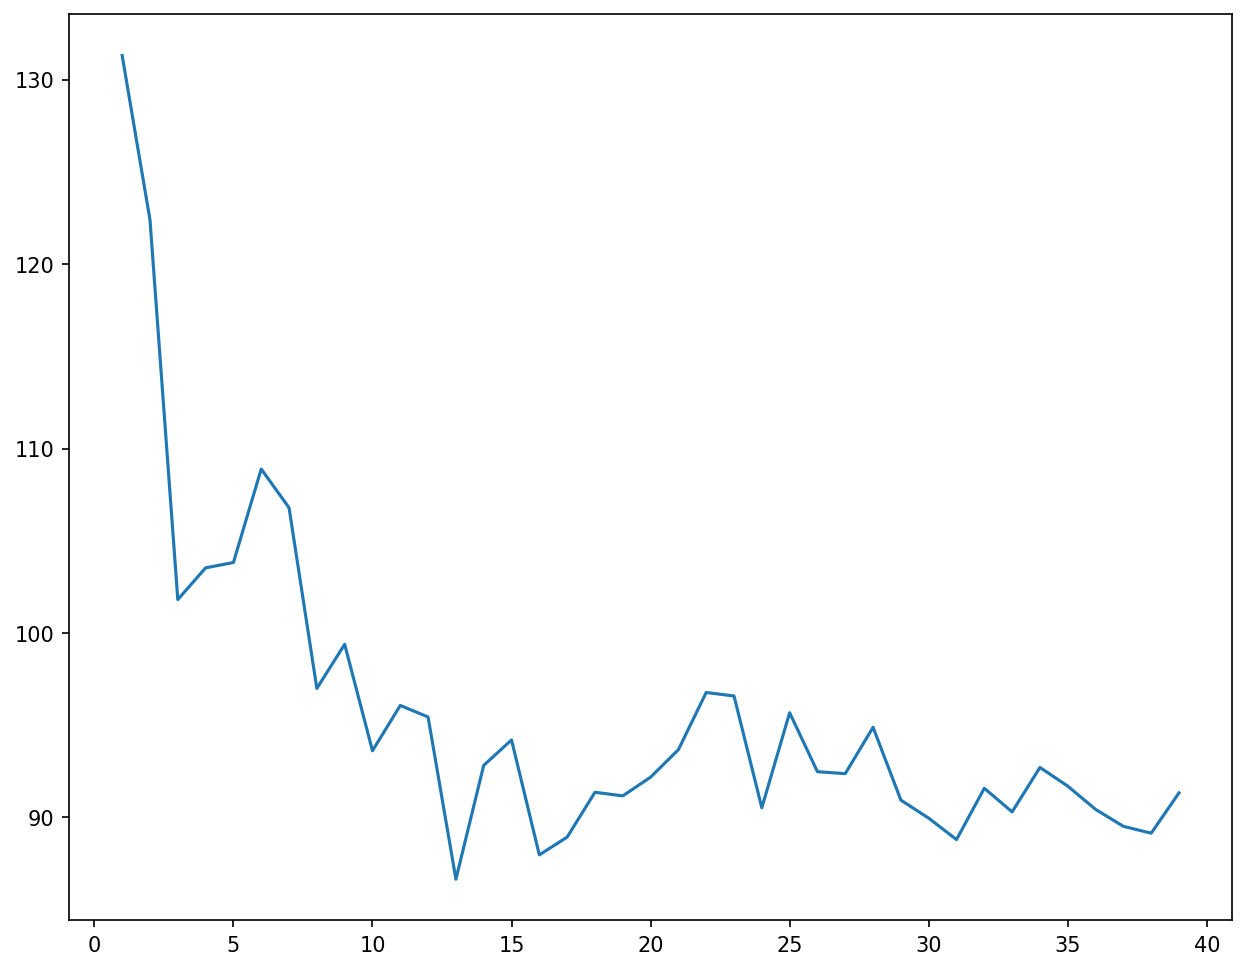

In [31]:
plt.figure(figsize=(10,8),dpi=150)
plt.plot(range(1,40),random_error)

In [46]:
final_random=RandomForestRegressor(n_estimators=16)
final_random.fit(X_train,y_train)
fr_predict=final_random.predict(X_test)
r2_score(y_test,fr_predict)

0.8775502919271221

In [47]:
mean_absolute_error(y_test,fr_predict)

89.4851640320291

In [27]:
random_predict=random.predict(X_test)

In [28]:
r2_score(y_test,random_predict)

0.8710237570877369

In [48]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    model.fit(X_train,y_train)
    
    preds=model.predict(X_test)
    
    rmse=mean_squared_error(y_test,preds)**0.5
    r2=r2_score(y_test,preds)
    
    print(f'RMSE : {rmse}')
    print(f'r2_score: {r2}')
    


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
GB=GradientBoostingRegressor()

In [52]:
run_model(GB,X_train,y_train,X_test,y_test)

RMSE : 218.091138198188
r2_score: 0.8136764535052285


In [53]:
import xgboost as xgb

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [56]:
xg_model=xgb.XGBRegressor()

In [57]:
run_model(xg_model,X_train,y_train,X_test,y_test)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\data.py:200: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


RMSE : 143.11965973358858
r2_score: 0.9197601156676668


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [58]:
from sklearn.svm import SVR

In [59]:
from sklearn.model_selection import GridSearchCV

In [70]:

param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [71]:
grid=GridSearchCV(svr,param_grid)

In [72]:
run_model(grid,X_train,y_train,X_test,y_test)

RMSE : 473.82101036463433
r2_score: 0.12053141098291831


In [69]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'
